[1.49984419e+04 1.68444157e+00]
[1.77601716 1.76341331 1.74953897 1.7347339  1.72932026 1.72409638]


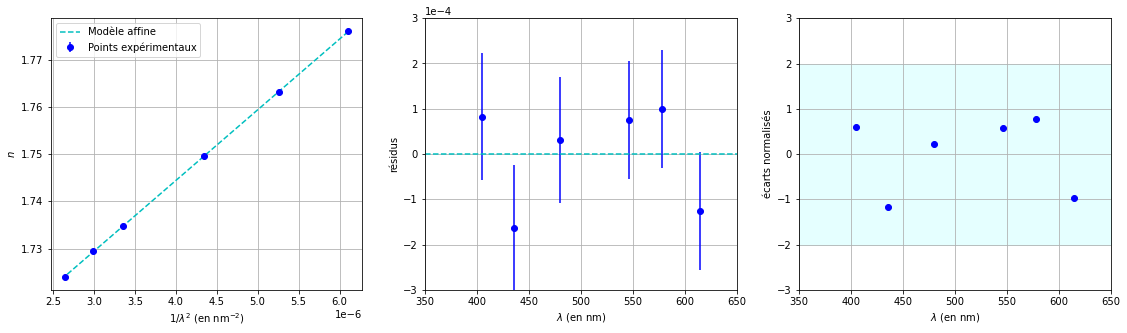

In [4]:
# Importation des bibliothèques utiles

import numpy as np # pour le traitement vectoriel des données
import numpy.random as rd # pour les tirages aléatoires
import matplotlib.pyplot as plt # pour les graphes

# Saisie des valeurs expérimentales
lamb = np.array([404.7, 435.8, 480.0, 546.1, 578.1, 615]) # longueurs d'onde (en nm)
n = np.array([1.77610, 1.76325, 1.74957, 1.73481, 1.72942, 1.72397])# indices optiques
u_n = np.array([1.4, 1.4, 1.4, 1.3, 1.3, 1.3])*1e-4 # incertitudes-types sur les indices

# Ajustement affine selon une loi de Cauchy
p = np.polyfit(1/lamb**2, n, 1)
print(p)
# p est un tableau contenant les coefficients de l'ajustement : p[0] pente ; p[1] ordonnée à l'origine

# Calcul des résidus et des écarts normalisés
n_mod = p[0]*1/lamb**2 + p[1]
print (n_mod)
# calcul des ordonnées des points "modèle"
residus = n - n_mod # calcul des résidus
En = residus/u_n # calcul des écarts normalisés

# Vérification graphique
plt.figure(figsize = (19,5))         # création d'une fenêtre graphique avec trois graphes

plt.subplot(1, 3, 1)                 # 1er graphe
# points expérimentaux avec barres d’erreur pour n
plt.errorbar(1/lamb**2, n, yerr = u_n, fmt = 'bo',label = "Points expérimentaux")
# points issus de la régression linéaire
plt.plot(1/lamb**2, n_mod, 'c--',label = "Modèle affine")
plt.xlabel(r"$1/\lambda^2$ (en nm$^{-2}$)")
plt.ylabel(r"$n$")
plt.grid(), plt.legend(loc = 'best')

plt.subplot(1, 3, 2)                 # 2ème graphe
# Affichage des résidus avec barres d'incertitude-type :
plt.errorbar(lamb, residus, yerr = u_n, fmt = 'bo')
# Pour mieux visualiser la droite correspondant à un résidu nul :
plt.plot([350, 650], [0, 0], 'c--')
plt.xlabel(r"$\lambda$ (en nm)"), plt.xlim(350, 650)
plt.ylabel(r"résidus"), plt.ylim(-3e-4, 3e-4),
plt.ticklabel_format(axis = 'y', style = 'sci', scilimits = (0,0))
plt.grid()

plt.subplot(1, 3, 3)                 # 3ème graphe [Celui qui est le plus en accord avec le programme]
# Affichage des écarts normalisés :
plt.plot(lamb, En, 'bo')
# Pour mieux visualiser le domaine des En acceptables :
plt.fill_between([350, 650], y1 = -2, y2 = 2, color = 'cyan', alpha = .1)
plt.xlabel(r"$\lambda$ (en nm)"), plt.xlim(350, 650)
plt.ylabel(r"écarts normalisés"), plt.ylim(-3,3)
plt.grid()
plt.show()

In [8]:
# Simulation Monte-Carlo

## Nombre d'expériences simulées
N = 50000

## Initialisation des listes dans lesquelles on va stocker les valeurs de A et B correspondant à chaque expérience simulée
Amc = []
Bmc = []

## Pour chaque expérience, on simule la mesure des n pour les 6 longueurs d'onde
for i in range(N):
  # on tire aléatoirement (distribution normale ou uniforme) une série de valeurs de n
    nmc = n + rd.normal(0, u_n, size = 6) 
  # on reprend l'ajustement affine avec cette série de valeurs de n
    p = np.polyfit(1/lamb**2, nmc, 1)
# on stocke les valeurs des paramètres d'ajustement dans les listes AMC et BMC
    Amc.append(p[1])
    Bmc.append(p[0])

## Calcul de la valeur moyenne et de l’écart-type de A
Amoy = np.mean(Amc)
u_A = np.std(Amc, ddof = 1)
print("Estimation du paramètre A de la loi de Cauchy :")
print("* Valeur mesurée : A = {:.4f}".format(Amoy))
print("* Incertitude-type : u(A) = {:.4f}\n".format(u_A))
## Calcul de la valeur moyenne et de l’écart-type de B
Bmoy = np.mean(Bmc)
u_B = np.std(Bmc, ddof = 1)
print("Estimation du paramètre B de la loi de Cauchy :")
print("* Valeur mesurée : B = {:.0f}".format(Bmoy))
print("* Incertitude-type : u(B) = {:.0f}".format(u_B))
print("Attention à ne pas oublier les unités s'il y en a!")

Estimation du paramètre A de la loi de Cauchy :
* Valeur mesurée : A = 1.6844
* Incertitude-type : u(A) = 0.0002

Estimation du paramètre B de la loi de Cauchy :
* Valeur mesurée : B = 14998
* Incertitude-type : u(B) = 45
Attention à ne pas oublier les unités s'il y en a!
